# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [16]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


## 1️) Load and Inspect the Dataset

In [17]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Double check some datatypes, and for nulls and duplicates:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [22]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [23]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [24]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


With real data, it is very likely more cleaning and wrangling would be required. 

## 3) Build Relational Tables

In [48]:
import sqlite3
conn = sqlite3.connect('../data/superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Postal Code','Region']].drop_duplicates().rename(columns={
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'City':'city',
    'State':'state',
    'Postal Code': 'postal_code',
    'Region':'region'
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id'
})

customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

## 4) Make Some Queries!

### Which customer segments bring in the most revenue and profit?

In [40]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,8380282.43,973085.86
1,Corporate,5044899.83,660287.69
2,Home Office,2964459.36,434344.01


### What are the top 10 customers by total sales?

In [41]:
query2 = """ 
SELECT 
    c.customer_name,
    SUM(od.sales) AS total_sales
FROM 
    customers AS c
JOIN 
    orders AS o ON c.customer_id = o.customer_id
JOIN 
    order_details AS od ON o.order_id = od.order_id
GROUP BY 
    c.customer_name
ORDER BY 
    total_sales DESC
LIMIT 10;
 """
result2 = pd.read_sql(query2, conn)
result2

,customer_name,total_sales
0,Ken Lonsdale,155927.519
1,Sanjit Engle,134303.818
2,Clay Ludtke,130566.552
3,Adrian Barton,130262.139
4,Sanjit Chand,127281.006
5,Sean Miller,125215.250
6,Edward Hooks,123730.560
7,Greg Tran,118201.200
8,Seth Vernon,114709.500
9,John Lee,107799.153


### Which product categories and subcategories are the most profitable overall?

In [42]:
query3 = """ 
SELECT 
    p.category,
    p.subcategory,
    SUM(od.profit) AS total_profit
FROM 
    products AS p
JOIN 
    order_details AS od ON p.product_id = od.product_id
GROUP BY 
    p.category, p.subcategory
ORDER BY 
    total_profit DESC;
 """
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,total_profit
0,Technology,Copiers,55617.8249
1,Technology,Accessories,48359.0527
2,Technology,Phones,46936.1861
3,Office Supplies,Paper,36994.5335
4,Office Supplies,Binders,30373.2020
5,Furniture,Chairs,26707.6526
6,Office Supplies,Storage,21408.7032
7,Office Supplies,Appliances,18514.4928
8,Furniture,Furnishings,14569.5873
9,Office Supplies,Envelopes,6964.1767


### What is the average discount given per category?

In [43]:
query4 = """ 
SELECT 
    p.category,
    AVG(od.discount) AS avg_discount
FROM 
    products AS p
JOIN 
    order_details AS od ON p.product_id = od.product_id
GROUP BY 
    p.category
ORDER BY 
    avg_discount DESC;
 """
result4 = pd.read_sql(query4, conn)
result4

,category,avg_discount
0,Furniture,0.172514
1,Office Supplies,0.157000
2,Technology,0.132970


### Which states or regions contribute the most to total sales?

In [32]:
query5 = """ 
SELECT 
    c.state,
    c.region,
    SUM(od.sales) AS total_sales
FROM 
    customers AS c
JOIN 
    orders AS o ON c.customer_id = o.customer_id
JOIN 
    order_details AS od ON o.order_id = od.order_id
GROUP BY 
    c.state, c.region
ORDER BY 
    total_sales DESC;
 """
result5 = pd.read_sql(query5, conn)
result5

,state,region,total_sales
0,California,West,2.991944e+06
1,New York,East,1.572500e+06
2,Texas,Central,1.495331e+06
3,Pennsylvania,East,8.142799e+05
4,Illinois,Central,7.977212e+05
5,Washington,West,7.839997e+05
6,Ohio,East,7.077477e+05
7,Florida,South,6.356378e+05
8,North Carolina,South,4.379384e+05
9,Michigan,Central,4.324280e+05


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [44]:
query6 = """ 
SELECT 
    COUNT(*) AS late_orders
FROM 
    orders
WHERE 
    julianday(ship_date) - julianday(order_date) > 3;
 """
result6 = pd.read_sql(query6, conn)
result6

,late_orders
0,3391


### Which month or year had the highest total sales?

In [34]:
query7 = """ 
SELECT 
    strftime('%Y', o.order_date) AS year,
    strftime('%m', o.order_date) AS month,
    SUM(od.sales) AS total_sales
FROM 
    orders AS o
JOIN 
    order_details AS od ON o.order_id = od.order_id
GROUP BY 
    year, month
ORDER BY 
    total_sales DESC
LIMIT 1;
 """
result7 = pd.read_sql(query7, conn)
result7

,year,month,total_sales
0,2014,11,112326.471


### What are the most frequently ordered products?

In [45]:
query8 = """ 
SELECT 
    p.product_name,
    COUNT(od.order_id) AS total_orders
FROM 
    products AS p
JOIN 
    order_details AS od ON p.product_id = od.product_id
GROUP BY 
    p.product_name
ORDER BY 
    total_orders DESC
LIMIT 10;
 """
result8 = pd.read_sql(query8, conn)
result8

,product_name,total_orders
0,Staples,227
1,Avery Non-Stick Binders,20
2,Xerox 1908,19
3,Xerox 1881,19
4,Logitech P710e Mobile Speakerphone,18
5,KI Adjustable-Height Table,18
6,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,18
7,Storex Dura Pro Binders,17
8,"Executive Impressions 13"" Clairmont Wall Clock",16
9,"Eldon Image Series Desk Accessories, Burgundy",16


### Which customers placed more than 5 orders total?

In [46]:
query9 = """ 
SELECT 
    c.customer_name,
    COUNT(o.order_id) AS total_orders
FROM 
    customers AS c
JOIN 
    orders AS o ON c.customer_id = o.customer_id
GROUP BY 
    c.customer_name
HAVING 
    COUNT(o.order_id) > 5
ORDER BY 
    total_orders DESC;
 """
result9 = pd.read_sql(query9, conn)
result9

,customer_name,total_orders
0,Emily Phan,289
1,Zuschuss Carroll,169
2,Sally Hughsby,169
3,Joel Eaton,169
4,Erin Ashbrook,169
...,...,...
742,Bart Folk,9
743,Barry Weirich,9
744,Astrea Jones,9
745,Alyssa Crouse,9


### What’s the profit margin (profit ÷ sales) by category or segment?

In [47]:
query10 = """ 
SELECT 
    p.category,
    c.customer_category AS segment,
    SUM(od.profit) / SUM(od.sales) AS profit_margin
FROM 
    order_details AS od
JOIN 
    orders AS o ON od.order_id = o.order_id
JOIN 
    customers AS c ON o.customer_id = c.customer_id
JOIN 
    products AS p ON od.product_id = p.product_id
GROUP BY 
    p.category, c.customer_category
ORDER BY 
    profit_margin DESC;
 """
result10 = pd.read_sql(query10, conn)
result10

,category,segment,profit_margin
0,Office Supplies,Home Office,0.227013
1,Technology,Corporate,0.181012
2,Technology,Home Office,0.172620
3,Technology,Consumer,0.171909
4,Office Supplies,Corporate,0.168362
5,Office Supplies,Consumer,0.156703
6,Furniture,Corporate,0.036267
7,Furniture,Home Office,0.028319
8,Furniture,Consumer,0.025243


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

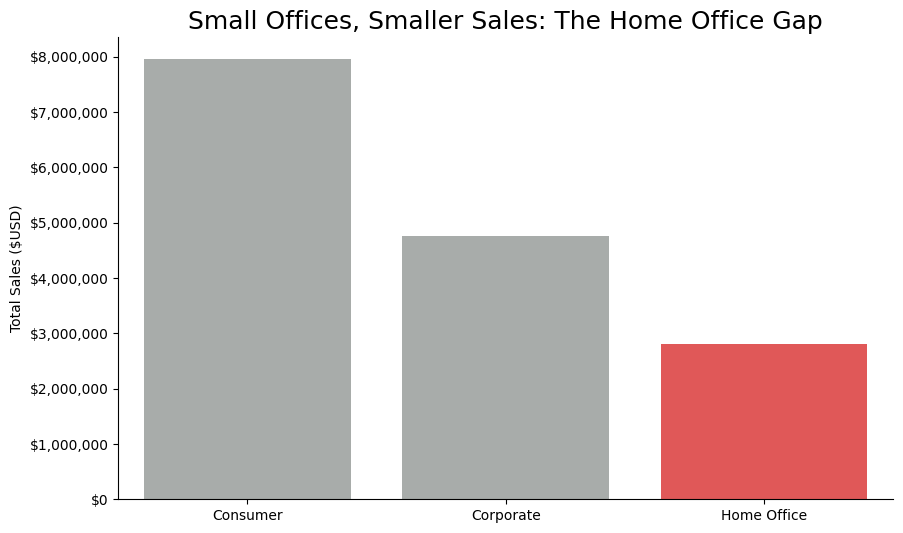

In [38]:
# example using result1
plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


/var/folders/6j/ng0s8_v10mj7kwbwccbbwd840000gn/T/ipykernel_59645/673349698.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_sales, x='region', y='Sales', palette='viridis')


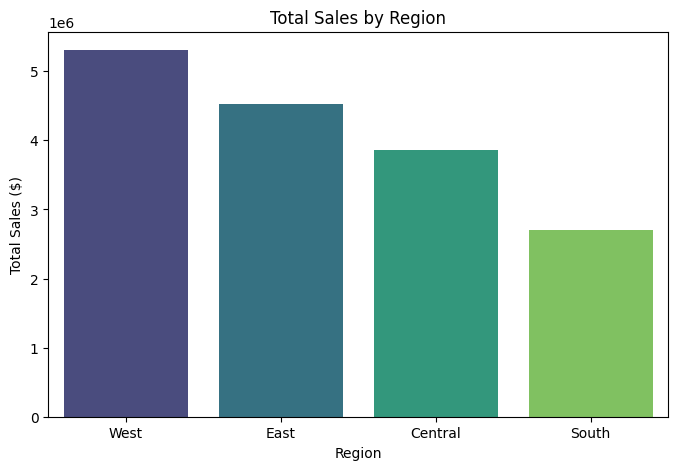

In [51]:
# visualization one code here

# --- Combine data from orders, customers, and order details ---
# Merge orders with customers (to get the region)
# Then merge order_details (to get the sales values)
regional_sales = (
    orders_df
    .merge(customers_df, on='customer_id')       # Adds customer info (region)
    .merge(order_details_df, on='order_id')      # Adds sales data
    .groupby('region', as_index=False)['Sales']  # Group by region
    .sum()                                       # Sum sales per region
    .sort_values('Sales', ascending=False)       # Sort by total sales
)

# --- Create a bar plot comparing regions ---
plt.figure(figsize=(8,5))                        # Set figure size
sns.barplot(data=regional_sales, x='region', y='Sales', palette='viridis')
plt.title("Total Sales by Region")               # Add chart title
plt.xlabel("Region")                             # X-axis label
plt.ylabel("Total Sales ($)")                    # Y-axis label
plt.show()                                       # Display chart




/var/folders/6j/ng0s8_v10mj7kwbwccbbwd840000gn/T/ipykernel_59645/356555245.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


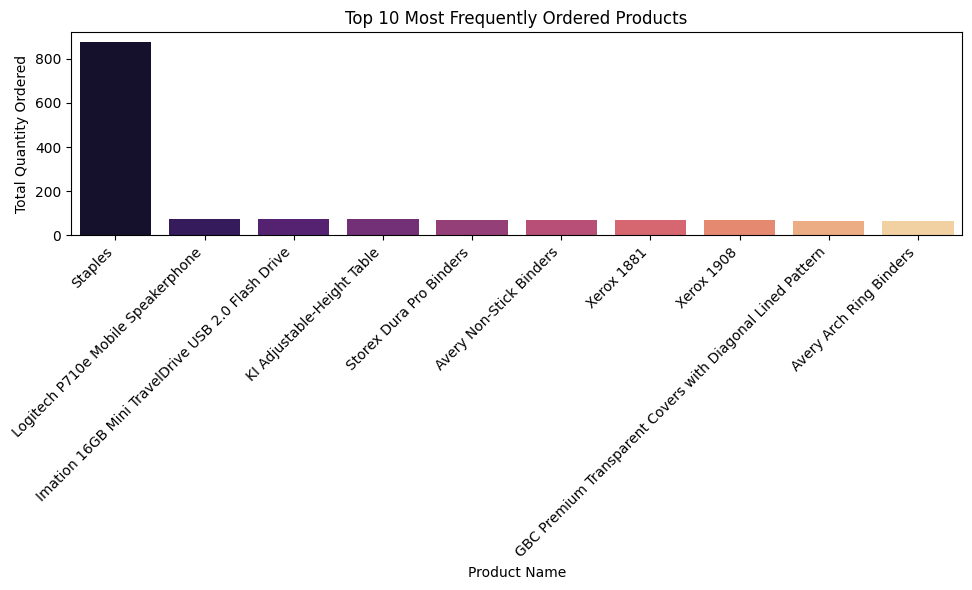

In [56]:
# visualization two code here
# --- Find the most frequently ordered products ---
# Merge order details with product info to get product names and quantities
product_orders = (
    order_details_df
    .merge(products_df, on='product_id')                 # Adds product name/category info
    .groupby('product_name', as_index=False)['Quantity'] # Group by product
    .sum()                                               # Sum total quantities ordered
    .sort_values('Quantity', ascending=False)            # Sort highest to lowest
    .head(10)                                            # Take top 10 most ordered products
)

# --- Create vertical bar chart ---
plt.figure(figsize=(10,6))                               # Set chart size
sns.barplot(
    data=product_orders,
    x='product_name', 
    y='Quantity', 
    palette='magma'
)
plt.title("Top 10 Most Frequently Ordered Products")     # Chart title
plt.xlabel("Product Name")                               # X-axis label
plt.ylabel("Total Quantity Ordered")                     # Y-axis label
plt.xticks(rotation=45, ha='right')                      # Rotate product names for readability
plt.tight_layout()                                       # Prevent label cutoff
plt.show()                                               # Display the chart



/var/folders/6j/ng0s8_v10mj7kwbwccbbwd840000gn/T/ipykernel_59645/3517073564.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


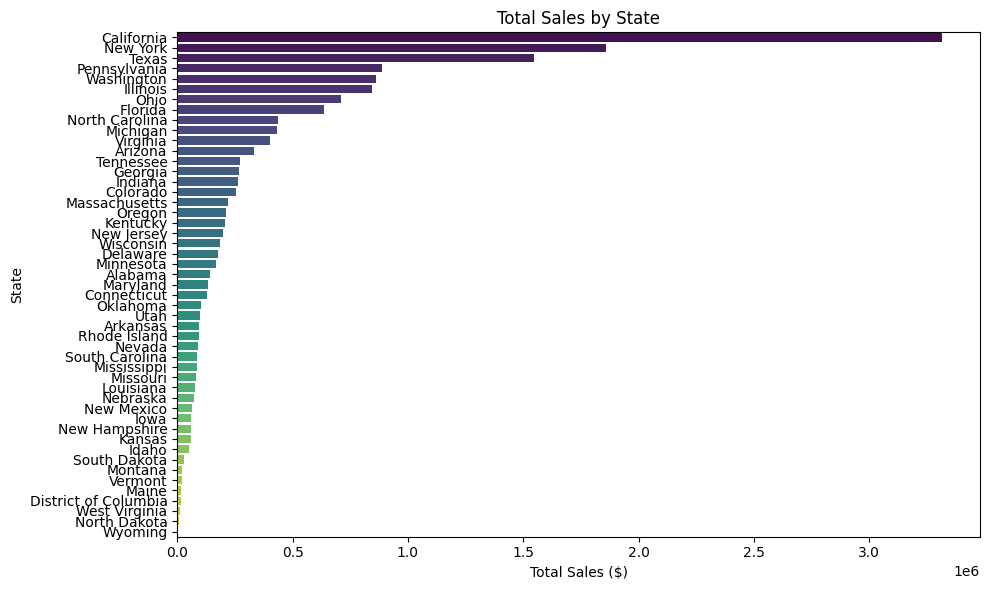

In [55]:
# visualization three code here
# --- Combine sales data with customer state info ---
state_sales = (
    orders_df
    .merge(customers_df, on='customer_id')        # Adds state/region info
    .merge(order_details_df, on='order_id')       # Adds sales values
    .groupby('state', as_index=False)['Sales']    # Group by state
    .sum()                                        # Sum sales per state
    .sort_values('Sales', ascending=False)        # Sort from high to low
)

# --- Create a horizontal bar chart ---
plt.figure(figsize=(10,6))
sns.barplot(
    data=state_sales,
    y='state',
    x='Sales',
    palette='viridis'
)
plt.title("Total Sales by State")
plt.xlabel("Total Sales ($)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


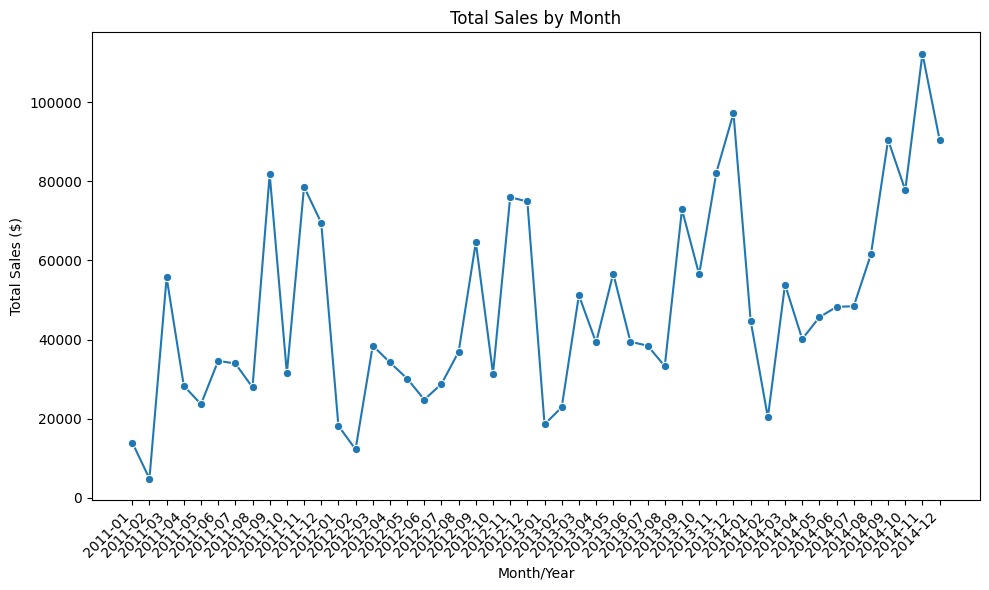

In [57]:
# visualization four code here

# --- Combine orders and sales info ---
sales_over_time = (
    orders_df
    .merge(order_details_df, on='order_id')  # Add sales info to each order
    .assign(order_month=lambda x: pd.to_datetime(x['order_date']).dt.to_period('M'))  # Extract year-month
    .groupby('order_month', as_index=False)['Sales']  # Group by month
    .sum()                                            # Sum total sales
)

# Convert Period to string for plotting
sales_over_time['order_month'] = sales_over_time['order_month'].astype(str)

# --- Line chart of sales over time ---
plt.figure(figsize=(10,6))
sns.lineplot(
    data=sales_over_time,
    x='order_month',
    y='Sales',
    marker='o'
)
plt.title("Total Sales by Month")
plt.xlabel("Month/Year")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
